<a href="https://colab.research.google.com/github/samad-yar-khan/EEG-ATCNet/blob/main/EEG_BTP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb). Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [NeMo Voice Swap](https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb): Use Nvidia's NeMo conversational AI Toolkit to swap a voice in an audio fragment with a computer generated one.

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.


In [ ]:
%pip install TensorFlow==2.7
%pip install matplotlib==3.5
%pip install NumPy==1.20
%pip install scikit-learn==1.0
%pip install SciPy==1.7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.7/489.7 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.1/463.1 KB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 4.8 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3
  Attempting uninstall: TensorFlow
    Foun

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 38.6 MB/s eta 0:00:00
  Attempting uninstall: NumPy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ml-dtypes 0.0.4 requires numpy>1.20, but you have numpy 1.20.0 which is incompatible.
librosa 0.10.0.post2 requires numpy!=1.22.0,!=1.22.1,!=1.22.2,>=1.20.3, but you have numpy 1.20.0 which is incompatible.
jaxlib 0.4.7+cuda11.cudnn86 requires numpy>=1.21, but you have numpy 1.20.0 which is incompatible.
jax 0.4.7 requires numpy>=1.21, but you have numpy 1.20.0 which is incompatible.
cmdstanpy 1.1.0 requires numpy>=1.21, but you have numpy 1.20.0 which is incompatible.
Looking in indexes: 

In [ ]:
""" 
Copyright (C) 2022 King Saud University, Saudi Arabia 
SPDX-License-Identifier: Apache-2.0 

Licensed under the Apache License, Version 2.0 (the "License"); you may not use
this file except in compliance with the License. You may obtain a copy of the 
License at

http://www.apache.org/licenses/LICENSE-2.0  

Unless required by applicable law or agreed to in writing, software distributed
under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR 
CONDITIONS OF ANY KIND, either express or implied. See the License for the
specific language governing permissions and limitations under the License. 

Author:  Hamdi Altaheri 
"""

# Dataset BCI Competition IV-2a is available on 
# http://bnci-horizon-2020.eu/database/data-sets

import numpy as np
import scipy.io as sio
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

#%%
def load_data_LOSO (data_path, subject): 
    """ Loading and Dividing of the data set based on the 
    'Leave One Subject Out' (LOSO) evaluation approach. 
    LOSO is used for  Subject-independent evaluation.
    In LOSO, the model is trained and evaluated by several folds, equal to the 
    number of subjects, and for each fold, one subject is used for evaluation
    and the others for training. The LOSO evaluation technique ensures that 
    separate subjects (not visible in the training data) are usedto evaluate 
    the model. 
   
        Parameters
        ----------
        data_path: string
            dataset path
            # Dataset BCI Competition IV-2a is available on 
            # http://bnci-horizon-2020.eu/database/data-sets
        subject: int
            number of subject in [1, .. ,9]
            Here, the subject data is used  test the model and other subjects data
            for training
    """
    
    X_train, y_train = [], []
    for sub in range (0,9):
        path = data_path + '/'
        
        X1, y1 = load_data(path, sub+1, True)
        X2, y2 = load_data(path, sub+1, False)
        X = np.concatenate((X1, X2), axis=0)
        y = np.concatenate((y1, y2), axis=0)
                   
        if (sub == subject):
            X_test = X
            y_test = y
        elif (X_train == []):
            X_train = X
            y_train = y
        else:
            X_train = np.concatenate((X_train, X), axis=0)
            y_train = np.concatenate((y_train, y), axis=0)

    return X_train, y_train, X_test, y_test

#%%
def load_data(data_path, subject, training, all_trials = True):
    """ Loading and Dividing of the data set based on the subject-specific 
      (subject-dependent) approach.
      In this approach, we used the same training and testing dataas the original
      competition, i.e., 288 x 9 trials in session 1 for training, 
      and 288 x 9 trials in session 2 for testing.  
    
          Parameters
          ----------
          data_path: string
              dataset path
              # Dataset BCI Competition IV-2a is available on 
              # http://bnci-horizon-2020.eu/database/data-sets
          subject: int
              number of subject in [1, .. ,9]
          training: bool
              if True, load training data
              if False, load testing data
          all_trials: bool
              if True, load all trials
              if False, ignore trials with artifacts 
    """
    # Define MI-trials parameters
    n_channels = 22
    n_tests = 6*48 	
    window_Length = 7*250 

    class_return = np.zeros(n_tests)
    data_return = np.zeros((n_tests, n_channels, window_Length))

    NO_valid_trial = 0
    if training:
        a = sio.loadmat(data_path+'A0'+str(subject)+'T.mat')
    else:
        a = sio.loadmat(data_path+'A0'+str(subject)+'E.mat')
    a_data = a['data']
    for ii in range(0,a_data.size):
        a_data1 = a_data[0,ii]
        a_data2= [a_data1[0,0]]
        a_data3= a_data2[0]
        a_X 		= a_data3[0]
        a_trial 	= a_data3[1]
        a_y 		= a_data3[2]
        a_artifacts = a_data3[5]

    for trial in range(0,a_trial.size):
        data_return[NO_valid_trial,:,:] = np.transpose(a_X[int(a_trial[trial]):(int(a_trial[trial])+window_Length),:22])
        class_return[NO_valid_trial] = int(a_y[trial])
        NO_valid_trial +=1
    return data_return[0:NO_valid_trial,:,:], class_return[0:NO_valid_trial]

#%%
def standardize_data(X_train, X_test, channels): 
    # X_train & X_test :[Trials, MI-tasks, Channels, Time points]
    for j in range(channels):
          scaler = StandardScaler()
          scaler.fit(X_train[:, 0, j, :])
          X_train[:, 0, j, :] = scaler.transform(X_train[:, 0, j, :])
          X_test[:, 0, j, :] = scaler.transform(X_test[:, 0, j, :])

    return X_train, X_test

#%%
def get_data(path, subject, LOSO = False, isStandard = True):
    # Define dataset parameters
    fs = 250          # sampling rate
    t1 = int(1.5*fs)  # start time_point
    t2 = int(6*fs)    # end time_point
    T = t2-t1         # length of the MI trial (samples or time_points)
    
    # Load and split the dataset into training and testing 
    if LOSO:
        # Loading and Dividing of the data set based on the 
        # 'Leave One Subject Out' (LOSO) evaluation approach. 
        X_train, y_train, X_test, y_test = load_data_LOSO(path, subject)
    else:
        # Loading and Dividing of the data set based on the subject-specific 
        # (subject-dependent) approach.In this approach, we used the same 
        # training and testing data as the original competition, i.e., trials 
        # in session 1 for training, and trials in session 2 for testing.  
        path = path+"/"
        X_train, y_train = load_data(path, subject+1, True)
        X_test, y_test = load_data(path, subject+1, False)

    # Prepare training data 	
    N_tr, N_ch, _ = X_train.shape 
    X_train = X_train[:, :, t1:t2].reshape(N_tr, 1, N_ch, T)
    y_train_onehot = (y_train-1).astype(int)
    y_train_onehot = to_categorical(y_train_onehot)
    # Prepare testing data 
    N_test, N_ch, _ = X_test.shape 
    X_test = X_test[:, :, t1:t2].reshape(N_test, 1, N_ch, T)
    y_test_onehot = (y_test-1).astype(int)
    y_test_onehot = to_categorical(y_test_onehot)	
    
    # Standardize the data
    if (isStandard == True):
        X_train, X_test = standardize_data(X_train, X_test, N_ch)

    return X_train, y_train, y_train_onehot, X_test, y_test, y_test_onehot

In [ ]:
import math
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, Reshape, Dense
from tensorflow.keras.layers import multiply, Permute, Concatenate, Conv2D, Add, Activation, Lambda
from tensorflow.keras.layers import Dropout, MultiHeadAttention, LayerNormalization, Reshape
from tensorflow.keras import backend as K


#%% Create and apply the attention model
def attention_block(net, attention_model): 
    in_sh = net.shape # dimensions of the input tensor
    in_len = len(in_sh) 
    expanded_axis = 3 # defualt = 3
    
    if attention_model == 'mha':   # Multi-head self attention layer 
        if(in_len > 3):
            net = Reshape((in_sh[1],-1))(net)
        net = mha_block(net)
    elif attention_model == 'mhla':  # Multi-head local self-attention layer 
        if(in_len > 3):
            net = Reshape((in_sh[1],-1))(net)
        net = mha_block(net, vanilla = False)
    elif attention_model == 'se':   # Squeeze-and-excitation layer
        if(in_len < 4):
            net = tf.expand_dims(net, axis=expanded_axis)
        net = se_block(net, ratio=8)
    elif attention_model == 'cbam': # Convolutional block attention module
        if(in_len < 4):
            net = tf.expand_dims(net, axis=expanded_axis)
        net = cbam_block(net, ratio=8)
    else:
        raise Exception("'{}' is not supported attention module!".format(attention_model))
        
    if (in_len == 3 and len(net.shape) == 4):
        net = K.squeeze(net, expanded_axis)
    elif (in_len == 4 and len(net.shape) == 3):
        net = Reshape((in_sh[1], in_sh[2], in_sh[3]))(net)
    return net


#%% Multi-head self Attention (MHA) block
def mha_block(input_feature, key_dim=8, num_heads=2, dropout = 0.5, vanilla = True):
    """Multi Head self Attention (MHA) block.     
       
    Here we include two types of MHA blocks: 
            The original multi-head self-attention as described in https://arxiv.org/abs/1706.03762
            The multi-head local self attention as described in https://arxiv.org/abs/2112.13492v1
    """    
    # Layer normalization
    x = LayerNormalization(epsilon=1e-6)(input_feature)
    
    if vanilla:
        # Create a multi-head attention layer as described in 
        # 'Attention Is All You Need' https://arxiv.org/abs/1706.03762
        x = MultiHeadAttention(key_dim = key_dim, num_heads = num_heads, dropout = dropout)(x, x)
    else:
        # Create a multi-head local self-attention layer as described in 
        # 'Vision Transformer for Small-Size Datasets' https://arxiv.org/abs/2112.13492v1
        
        # Build the diagonal attention mask
        NUM_PATCHES = input_feature.shape[1]
        diag_attn_mask = 1 - tf.eye(NUM_PATCHES)
        diag_attn_mask = tf.cast([diag_attn_mask], dtype=tf.int8)
        
        # Create a multi-head local self attention layer.
        x = MultiHeadAttention_LSA(key_dim = key_dim, num_heads = num_heads, dropout = dropout)(
            x, x, attention_mask = diag_attn_mask)
        
    x = Dropout(0.3)(x)
    # Skip connection
    mha_feature = Add()([input_feature, x])
    
    return mha_feature


#%% Multi head self Attention (MHA) block: Locality Self Attention (LSA)
class MultiHeadAttention_LSA(tf.keras.layers.MultiHeadAttention):
    """local multi-head self attention block
     
     Locality Self Attention as described in https://arxiv.org/abs/2112.13492v1
     This implementation is taken from  https://keras.io/examples/vision/vit_small_ds/ 
    """    
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        # The trainable temperature term. The initial value is the square 
        # root of the key dimension.
        self.tau = tf.Variable(math.sqrt(float(self._key_dim)), trainable=True)

    def _compute_attention(self, query, key, value, attention_mask=None, training=None):
        query = tf.multiply(query, 1.0 / self.tau)
        attention_scores = tf.einsum(self._dot_product_equation, key, query)
        attention_scores = self._masked_softmax(attention_scores, attention_mask)
        attention_scores_dropout = self._dropout_layer(
            attention_scores, training=training
        )
        attention_output = tf.einsum(
            self._combine_equation, attention_scores_dropout, value
        )
        return attention_output, attention_scores


#%% Squeeze-and-excitation block
def se_block(input_feature, ratio=8):
	"""Squeeze-and-Excitation(SE) block.
    
	As described in https://arxiv.org/abs/1709.01507
    The implementation is taken from https://github.com/kobiso/CBAM-keras
	"""
	channel_axis = 1 if K.image_data_format() == "channels_first" else -1
	channel = input_feature.shape[channel_axis]

	se_feature = GlobalAveragePooling2D()(input_feature)
	se_feature = Reshape((1, 1, channel))(se_feature)
	assert se_feature.shape[1:] == (1,1,channel)
	se_feature = Dense(channel // ratio,
					   activation='relu',
					   kernel_initializer='he_normal',
					   use_bias=True,
					   bias_initializer='zeros')(se_feature)
	assert se_feature.shape[1:] == (1,1,channel//ratio)
	se_feature = Dense(channel,
					   activation='sigmoid',
					   kernel_initializer='he_normal',
					   use_bias=True,
					   bias_initializer='zeros')(se_feature)
	assert se_feature.shape[1:] == (1,1,channel)
	if K.image_data_format() == 'channels_first':
		se_feature = Permute((3, 1, 2))(se_feature)

	se_feature = multiply([input_feature, se_feature])
	return se_feature


#%% Convolutional block attention module
def cbam_block(cbam_feature, ratio=8):
	""" Convolutional Block Attention Module(CBAM) block.
    
	As described in https://arxiv.org/abs/1807.06521
    The implementation is taken from https://github.com/kobiso/CBAM-keras
	"""
	
	cbam_feature = channel_attention(cbam_feature, ratio)
	cbam_feature = spatial_attention(cbam_feature)
	return cbam_feature

def channel_attention(input_feature, ratio=8):
	channel_axis = 1 if K.image_data_format() == "channels_first" else -1
# 	channel = input_feature._keras_shape[channel_axis]
	channel = input_feature.shape[channel_axis]
    
	shared_layer_one = Dense(channel//ratio,
							 activation='relu',
							 kernel_initializer='he_normal',
							 use_bias=True,
							 bias_initializer='zeros')
	shared_layer_two = Dense(channel,
							 kernel_initializer='he_normal',
							 use_bias=True,
							 bias_initializer='zeros')
	
	avg_pool = GlobalAveragePooling2D()(input_feature)    
	avg_pool = Reshape((1,1,channel))(avg_pool)
	assert avg_pool.shape[1:] == (1,1,channel)
	avg_pool = shared_layer_one(avg_pool)
	assert avg_pool.shape[1:] == (1,1,channel//ratio)
	avg_pool = shared_layer_two(avg_pool)
	assert avg_pool.shape[1:] == (1,1,channel)
	
	max_pool = GlobalMaxPooling2D()(input_feature)
	max_pool = Reshape((1,1,channel))(max_pool)
	assert max_pool.shape[1:] == (1,1,channel)
	max_pool = shared_layer_one(max_pool)
	assert max_pool.shape[1:] == (1,1,channel//ratio)
	max_pool = shared_layer_two(max_pool)
	assert max_pool.shape[1:] == (1,1,channel)
	
	cbam_feature = Add()([avg_pool,max_pool])
	cbam_feature = Activation('sigmoid')(cbam_feature)
	
	if K.image_data_format() == "channels_first":
		cbam_feature = Permute((3, 1, 2))(cbam_feature)
	
	return multiply([input_feature, cbam_feature])

def spatial_attention(input_feature):
	kernel_size = 7
	
	if K.image_data_format() == "channels_first":
		channel = input_feature.shape[1]
		cbam_feature = Permute((2,3,1))(input_feature)
	else:
		channel = input_feature.shape[-1]
		cbam_feature = input_feature
	
	avg_pool = Lambda(lambda x: K.mean(x, axis=3, keepdims=True))(cbam_feature)
	assert avg_pool.shape[-1] == 1
	max_pool = Lambda(lambda x: K.max(x, axis=3, keepdims=True))(cbam_feature)
	assert max_pool.shape[-1] == 1
	concat = Concatenate(axis=3)([avg_pool, max_pool])
	assert concat.shape[-1] == 2
	cbam_feature = Conv2D(filters = 1,
					kernel_size=kernel_size,
					strides=1,
					padding='same',
					activation='sigmoid',
					kernel_initializer='he_normal',
					use_bias=False)(concat)	
	assert cbam_feature.shape[-1] == 1
	
	if K.image_data_format() == "channels_first":
		cbam_feature = Permute((3, 1, 2))(cbam_feature)
		
	return multiply([input_feature, cbam_feature])
		
	

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, AveragePooling2D, MaxPooling2D
from tensorflow.keras.layers import Conv1D, Conv2D, SeparableConv2D, DepthwiseConv2D
from tensorflow.keras.layers import BatchNormalization, LayerNormalization, Flatten 
from tensorflow.keras.layers import Add, Concatenate, Lambda, Input, Permute
from tensorflow.keras.constraints import max_norm

from tensorflow.keras import backend as K
        
#%% The proposed ATCNet model, https://doi.org/10.1109/TII.2022.3197419
def ATCNet(n_classes, in_chans = 22, in_samples = 1125, n_windows = 3, attention = None, 
           eegn_F1 = 16, eegn_D = 2, eegn_kernelSize = 64, eegn_poolSize = 8, eegn_dropout=0.3, 
           tcn_depth = 2, tcn_kernelSize = 4, tcn_filters = 32, tcn_dropout = 0.3, 
           tcn_activation = 'elu', fuse = 'average'):
    """ ATCNet model from Altaheri et al 2022.
        See details at https://ieeexplore.ieee.org/abstract/document/9852687
    
        Notes
        -----
        The initial values in this model are based on the values identified by
        the authors
        
        References
        ----------
        .. H. Altaheri, G. Muhammad and M. Alsulaiman, "Physics-informed 
           attention temporal convolutional network for EEG-based motor imagery 
           classification," in IEEE Transactions on Industrial Informatics, 2022, 
           doi: 10.1109/TII.2022.3197419.
    """
    input_1 = Input(shape = (1,in_chans, in_samples))   #     TensorShape([None, 1, 22, 1125])
    input_2 = Permute((3,2,1))(input_1) 
    regRate=.25
    numFilters = eegn_F1
    F2 = numFilters*eegn_D

    block1 = Conv_block(input_layer = input_2, F1 = eegn_F1, D = eegn_D, 
                        kernLength = eegn_kernelSize, poolSize = eegn_poolSize,
                        in_chans = in_chans, dropout = eegn_dropout)
    block1 = Lambda(lambda x: x[:,:,-1,:])(block1)
     
    # Sliding window 
    sw_concat = []   # to store concatenated or averaged sliding window outputs
    for i in range(n_windows):
        st = i
        end = block1.shape[1]-n_windows+i+1
        block2 = block1[:, st:end, :]
        
        # Attention_model
        if attention is not None:
            block2 = attention_block(block2, attention)

        # Temporal convolutional network (TCN)
        block3 = TCN_block(input_layer = block2, input_dimension = F2, depth = tcn_depth,
                            kernel_size = tcn_kernelSize, filters = tcn_filters, 
                            dropout = tcn_dropout, activation = tcn_activation)
        # Get feature maps of the last sequence
        block3 = Lambda(lambda x: x[:,-1,:])(block3)
        
        # Outputs of sliding window: Average_after_dense or concatenate_then_dense
        if(fuse == 'average'):
            sw_concat.append(Dense(n_classes, kernel_constraint = max_norm(regRate))(block3))
        elif(fuse == 'concat'):
            if i == 0:
                sw_concat = block3
            else:
                sw_concat = Concatenate()([sw_concat, block3])
                
    if(fuse == 'average'):
        if len(sw_concat) > 1: # more than one window
            sw_concat = tf.keras.layers.Average()(sw_concat[:])
        else: # one window (# windows = 1)
            sw_concat = sw_concat[0]
    elif(fuse == 'concat'):
        sw_concat = Dense(n_classes, kernel_constraint = max_norm(regRate))(sw_concat)
            
    
    softmax = Activation('softmax', name = 'softmax')(sw_concat)
    
    return Model(inputs = input_1, outputs = softmax)

#%% Convolutional (CV) block used in the ATCNet model
def Conv_block(input_layer, F1=4, kernLength=64, poolSize=8, D=2, in_chans=22, dropout=0.1):
    """ Conv_block
    
        Notes
        -----
        This block is the same as EEGNet with SeparableConv2D replaced by Conv2D 
        The original code for this model is available at: https://github.com/vlawhern/arl-eegmodels
        See details at https://arxiv.org/abs/1611.08024
    """
    F2= F1*D
    block1 = Conv2D(F1, (kernLength, 1), padding = 'same',data_format='channels_last',use_bias = False)(input_layer)
    block1 = BatchNormalization(axis = -1)(block1)
    block2 = DepthwiseConv2D((1, in_chans), use_bias = False, 
                                    depth_multiplier = D,
                                    data_format='channels_last',
                                    depthwise_constraint = max_norm(1.))(block1)
    block2 = BatchNormalization(axis = -1)(block2)
    block2 = Activation('elu')(block2)
    block2 = AveragePooling2D((8,1),data_format='channels_last')(block2)
    block2 = Dropout(dropout)(block2)
    block3 = Conv2D(F2, (16, 1),
                            data_format='channels_last',
                            use_bias = False, padding = 'same')(block2)
    block3 = BatchNormalization(axis = -1)(block3)
    block3 = Activation('elu')(block3)
    
    block3 = AveragePooling2D((poolSize,1),data_format='channels_last')(block3)
    block3 = Dropout(dropout)(block3)
    return block3

#%% Temporal convolutional (TC) block used in the ATCNet model
def TCN_block(input_layer,input_dimension,depth,kernel_size,filters,dropout,activation='relu'):
    """ TCN_block from Bai et al 2018
        Temporal Convolutional Network (TCN)
        
        Notes
        -----
        THe original code available at https://github.com/locuslab/TCN/blob/master/TCN/tcn.py
        This implementation has a slight modification from the original code
        and it is taken from the code by Ingolfsson et al at https://github.com/iis-eth-zurich/eeg-tcnet
        See details at https://arxiv.org/abs/2006.00622

        References
        ----------
        .. Bai, S., Kolter, J. Z., & Koltun, V. (2018).
           An empirical evaluation of generic convolutional and recurrent networks
           for sequence modeling.
           arXiv preprint arXiv:1803.01271.
    """    
    
    block = Conv1D(filters,kernel_size=kernel_size,dilation_rate=1,activation='linear',
                   padding = 'causal',kernel_initializer='he_uniform')(input_layer)
    block = BatchNormalization()(block)
    block = Activation(activation)(block)
    block = Dropout(dropout)(block)
    block = Conv1D(filters,kernel_size=kernel_size,dilation_rate=1,activation='linear',
                   padding = 'causal',kernel_initializer='he_uniform')(block)
    block = BatchNormalization()(block)
    block = Activation(activation)(block)
    block = Dropout(dropout)(block)
    if(input_dimension != filters):
        conv = Conv1D(filters,kernel_size=1,padding='same')(input_layer)
        added = Add()([block,conv])
    else:
        added = Add()([block,input_layer])
    out = Activation(activation)(added)
    
    for i in range(depth-1):
        block = Conv1D(filters,kernel_size=kernel_size,dilation_rate=2**(i+1),activation='linear',
                   padding = 'causal',kernel_initializer='he_uniform')(out)
        block = BatchNormalization()(block)
        block = Activation(activation)(block)
        block = Dropout(dropout)(block)
        block = Conv1D(filters,kernel_size=kernel_size,dilation_rate=2**(i+1),activation='linear',
                   padding = 'causal',kernel_initializer='he_uniform')(block)
        block = BatchNormalization()(block)
        block = Activation(activation)(block)
        block = Dropout(dropout)(block)
        added = Add()([block, out])
        out = Activation(activation)(added)
        
    return out


#%% Reproduced TCNet_Fusion model: https://doi.org/10.1016/j.bspc.2021.102826
def TCNet_Fusion(n_classes,Chans=22, Samples=1125, layers=2, kernel_s=4, filt=12,
                 dropout=0.3, activation='elu', F1=24, D=2, kernLength=32, dropout_eeg=0.3):
    """ TCNet_Fusion model from Musallam et al 2021.
    See details at https://doi.org/10.1016/j.bspc.2021.102826
    
        Notes
        -----
        The initial values in this model are based on the values identified by
        the authors
        
        References
        ----------
        .. Musallam, Y.K., AlFassam, N.I., Muhammad, G., Amin, S.U., Alsulaiman,
           M., Abdul, W., Altaheri, H., Bencherif, M.A. and Algabri, M., 2021. 
           Electroencephalography-based motor imagery classification
           using temporal convolutional network fusion. 
           Biomedical Signal Processing and Control, 69, p.102826.
    """
    input1 = Input(shape = (1,Chans, Samples))
    input2 = Permute((3,2,1))(input1)
    regRate=.25

    numFilters = F1
    F2= numFilters*D
    
    EEGNet_sep = EEGNet(input_layer=input2,F1=F1,kernLength=kernLength,D=D,Chans=Chans,dropout=dropout_eeg)
    block2 = Lambda(lambda x: x[:,:,-1,:])(EEGNet_sep)
    FC = Flatten()(block2) 

    outs = TCN_block(input_layer=block2,input_dimension=F2,depth=layers,kernel_size=kernel_s,filters=filt,dropout=dropout,activation=activation)

    Con1 = Concatenate()([block2,outs]) 
    out = Flatten()(Con1) 
    Con2 = Concatenate()([out,FC]) 
    dense        = Dense(n_classes, name = 'dense',kernel_constraint = max_norm(regRate))(Con2)
    softmax      = Activation('softmax', name = 'softmax')(dense)
    
    return Model(inputs=input1,outputs=softmax)

#%% Reproduced EEGTCNet model: https://arxiv.org/abs/2006.00622
def EEGTCNet(n_classes, Chans=22, Samples=1125, layers=2, kernel_s=4, filt=12, dropout=0.3, activation='elu', F1=8, D=2, kernLength=32, dropout_eeg=0.2):
    """ EEGTCNet model from Ingolfsson et al 2020.
    See details at https://arxiv.org/abs/2006.00622
    
    The original code for this model is available at https://github.com/iis-eth-zurich/eeg-tcnet
    
        Notes
        -----
        The initial values in this model are based on the values identified by the authors
        
        References
        ----------
        .. Ingolfsson, T. M., Hersche, M., Wang, X., Kobayashi, N.,
           Cavigelli, L., & Benini, L. (2020, October). 
           Eeg-tcnet: An accurate temporal convolutional network
           for embedded motor-imagery brain–machine interfaces. 
           In 2020 IEEE International Conference on Systems, 
           Man, and Cybernetics (SMC) (pp. 2958-2965). IEEE.
    """
    input1 = Input(shape = (1,Chans, Samples))
    input2 = Permute((3,2,1))(input1)
    regRate=.25
    numFilters = F1
    F2= numFilters*D

    EEGNet_sep = EEGNet(input_layer=input2,F1=F1,kernLength=kernLength,D=D,Chans=Chans,dropout=dropout_eeg)
    block2 = Lambda(lambda x: x[:,:,-1,:])(EEGNet_sep)
    outs = TCN_block(input_layer=block2,input_dimension=F2,depth=layers,kernel_size=kernel_s,filters=filt,dropout=dropout,activation=activation)
    out = Lambda(lambda x: x[:,-1,:])(outs)
    dense        = Dense(n_classes, name = 'dense',kernel_constraint = max_norm(regRate))(out)
    softmax      = Activation('softmax', name = 'softmax')(dense)
    
    return Model(inputs=input1,outputs=softmax)

#%% Reproduced EEGNeX model: https://arxiv.org/abs/2207.12369
def EEGNeX_8_32(n_timesteps, n_features, n_outputs):
    """ EEGNeX model from Chen et al 2022.
    See details at https://arxiv.org/abs/2207.12369
    
    The original code for this model is available at https://github.com/chenxiachan/EEGNeX
           
        References
        ----------
        .. Chen, X., Teng, X., Chen, H., Pan, Y., & Geyer, P. (2022).
           Toward reliable signals decoding for electroencephalogram: 
           A benchmark study to EEGNeX. arXiv preprint arXiv:2207.12369.
    """

    model = Sequential()
    model.add(Input(shape=(1, n_features, n_timesteps)))

    model.add(Conv2D(filters=8, kernel_size=(1, 32), use_bias = False, padding='same', data_format="channels_first"))
    model.add(LayerNormalization())
    model.add(Activation(activation='elu'))
    model.add(Conv2D(filters=32, kernel_size=(1, 32), use_bias = False, padding='same', data_format="channels_first"))
    model.add(LayerNormalization())
    model.add(Activation(activation='elu'))

    model.add(DepthwiseConv2D(kernel_size=(n_features, 1), depth_multiplier=2, use_bias = False, depthwise_constraint=max_norm(1.), data_format="channels_first"))
    model.add(LayerNormalization())
    model.add(Activation(activation='elu'))
    model.add(AveragePooling2D(pool_size=(1, 4), padding='same', data_format="channels_first"))
    model.add(Dropout(0.5))

    
    model.add(Conv2D(filters=32, kernel_size=(1, 16), use_bias = False, padding='same', dilation_rate=(1, 2), data_format='channels_first'))
    model.add(LayerNormalization())
    model.add(Activation(activation='elu'))
    
    model.add(Conv2D(filters=8, kernel_size=(1, 16), use_bias = False, padding='same', dilation_rate=(1, 4),  data_format='channels_first'))
    model.add(LayerNormalization())
    model.add(Activation(activation='elu'))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(n_outputs, kernel_constraint=max_norm(0.25)))
    model.add(Activation(activation='softmax'))
    
    # save a plot of the model
    # plot_model(model, show_shapes=True, to_file='EEGNeX_8_32.png')
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model 

#%% Reproduced EEGNet model: https://arxiv.org/abs/1611.08024
def EEGNet_classifier(n_classes, Chans=22, Samples=1125, F1=8, D=2, kernLength=64, dropout_eeg=0.25):
    input1 = Input(shape = (1,Chans, Samples))   
    input2 = Permute((3,2,1))(input1) 
    regRate=.25

    eegnet = EEGNet(input_layer=input2, F1=F1, kernLength=kernLength, D=D, Chans=Chans, dropout=dropout_eeg)
    eegnet = Flatten()(eegnet)
    dense = Dense(n_classes, name = 'dense',kernel_constraint = max_norm(regRate))(eegnet)
    softmax = Activation('softmax', name = 'softmax')(dense)
    
    return Model(inputs=input1, outputs=softmax)

def EEGNet(input_layer, F1=8, kernLength=64, D=2, Chans=22, dropout=0.25):
    """ EEGNet model from Lawhern et al 2018
    See details at https://arxiv.org/abs/1611.08024
    
    The original code for this model is available at: https://github.com/vlawhern/arl-eegmodels
    
        Notes
        -----
        The initial values in this model are based on the values identified by the authors
        
        References
        ----------
        .. Lawhern, V. J., Solon, A. J., Waytowich, N. R., Gordon,
           S. M., Hung, C. P., & Lance, B. J. (2018).
           EEGNet: A Compact Convolutional Network for EEG-based
           Brain-Computer Interfaces.
           arXiv preprint arXiv:1611.08024.
    """
    F2= F1*D
    block1 = Conv2D(F1, (kernLength, 1), padding = 'same',data_format='channels_last',use_bias = False)(input_layer)
    block1 = BatchNormalization(axis = -1)(block1)
    block2 = DepthwiseConv2D((1, Chans), use_bias = False, 
                                    depth_multiplier = D,
                                    data_format='channels_last',
                                    depthwise_constraint = max_norm(1.))(block1)
    block2 = BatchNormalization(axis = -1)(block2)
    block2 = Activation('elu')(block2)
    block2 = AveragePooling2D((8,1),data_format='channels_last')(block2)
    block2 = Dropout(dropout)(block2)
    block3 = SeparableConv2D(F2, (16, 1),
                            data_format='channels_last',
                            use_bias = False, padding = 'same')(block2)
    block3 = BatchNormalization(axis = -1)(block3)
    block3 = Activation('elu')(block3)
    block3 = AveragePooling2D((8,1),data_format='channels_last')(block3)
    block3 = Dropout(dropout)(block3)
    return block3

#%% Reproduced DeepConvNet model: https://onlinelibrary.wiley.com/doi/full/10.1002/hbm.23730
def DeepConvNet(nb_classes, Chans = 64, Samples = 256,
                dropoutRate = 0.5):
    """ Keras implementation of the Deep Convolutional Network as described in
    Schirrmeister et. al. (2017), Human Brain Mapping.
    See details at https://onlinelibrary.wiley.com/doi/full/10.1002/hbm.23730
    
    The original code for this model is available at:
        https://github.com/braindecode/braindecode
    
    This implementation is taken from code by the Army Research Laboratory (ARL) 
    at https://github.com/vlawhern/arl-eegmodels
    
    This implementation assumes the input is a 2-second EEG signal sampled at 
    128Hz, as opposed to signals sampled at 250Hz as described in the original
    paper. We also perform temporal convolutions of length (1, 5) as opposed
    to (1, 10) due to this sampling rate difference. 
    
    Note that we use the max_norm constraint on all convolutional layers, as 
    well as the classification layer. We also change the defaults for the
    BatchNormalization layer. We used this based on a personal communication 
    with the original authors.
    
                      ours        original paper
    pool_size        1, 2        1, 3
    strides          1, 2        1, 3
    conv filters     1, 5        1, 10
    
    Note that this implementation has not been verified by the original 
    authors. 
    
    """

    # start the model
    # input_main   = Input((Chans, Samples, 1))
    input_main   = Input((1, Chans, Samples))
    input_2 = Permute((2,3,1))(input_main) 
    
    block1       = Conv2D(25, (1, 5), 
                                 input_shape=(Chans, Samples, 1),
                                 kernel_constraint = max_norm(2., axis=(0,1,2)))(input_2)
    block1       = Conv2D(25, (Chans, 1),
                                 kernel_constraint = max_norm(2., axis=(0,1,2)))(block1)
    block1       = BatchNormalization(epsilon=1e-05, momentum=0.9)(block1)
    block1       = Activation('elu')(block1)
    block1       = MaxPooling2D(pool_size=(1, 2), strides=(1, 2))(block1)
    block1       = Dropout(dropoutRate)(block1)
  
    block2       = Conv2D(50, (1, 5),
                                 kernel_constraint = max_norm(2., axis=(0,1,2)))(block1)
    block2       = BatchNormalization(epsilon=1e-05, momentum=0.9)(block2)
    block2       = Activation('elu')(block2)
    block2       = MaxPooling2D(pool_size=(1, 2), strides=(1, 2))(block2)
    block2       = Dropout(dropoutRate)(block2)
    
    block3       = Conv2D(100, (1, 5),
                                 kernel_constraint = max_norm(2., axis=(0,1,2)))(block2)
    block3       = BatchNormalization(epsilon=1e-05, momentum=0.9)(block3)
    block3       = Activation('elu')(block3)
    block3       = MaxPooling2D(pool_size=(1, 2), strides=(1, 2))(block3)
    block3       = Dropout(dropoutRate)(block3)
    
    block4       = Conv2D(200, (1, 5),
                                 kernel_constraint = max_norm(2., axis=(0,1,2)))(block3)
    block4       = BatchNormalization(epsilon=1e-05, momentum=0.9)(block4)
    block4       = Activation('elu')(block4)
    block4       = MaxPooling2D(pool_size=(1, 2), strides=(1, 2))(block4)
    block4       = Dropout(dropoutRate)(block4)
    
    flatten      = Flatten()(block4)
    
    dense        = Dense(nb_classes, kernel_constraint = max_norm(0.5))(flatten)
    softmax      = Activation('softmax')(dense)
    
    return Model(inputs=input_main, outputs=softmax)

#%% need these for ShallowConvNet
def square(x):
    return K.square(x)

def log(x):
    return K.log(K.clip(x, min_value = 1e-7, max_value = 10000))   

#%% Reproduced ShallowConvNet model: https://onlinelibrary.wiley.com/doi/full/10.1002/hbm.23730
def ShallowConvNet(nb_classes, Chans = 64, Samples = 128, dropoutRate = 0.5):
    """ Keras implementation of the Shallow Convolutional Network as described
    in Schirrmeister et. al. (2017), Human Brain Mapping.
    See details at https://onlinelibrary.wiley.com/doi/full/10.1002/hbm.23730
    
    The original code for this model is available at:
        https://github.com/braindecode/braindecode

    This implementation is taken from code by the Army Research Laboratory (ARL) 
    at https://github.com/vlawhern/arl-eegmodels

    Assumes the input is a 2-second EEG signal sampled at 128Hz. Note that in 
    the original paper, they do temporal convolutions of length 25 for EEG
    data sampled at 250Hz. We instead use length 13 since the sampling rate is 
    roughly half of the 250Hz which the paper used. The pool_size and stride
    in later layers is also approximately half of what is used in the paper.
    
    Note that we use the max_norm constraint on all convolutional layers, as 
    well as the classification layer. We also change the defaults for the
    BatchNormalization layer. We used this based on a personal communication 
    with the original authors.
    
                     ours        original paper
    pool_size        1, 35       1, 75
    strides          1, 7        1, 15
    conv filters     1, 13       1, 25    
    
    Note that this implementation has not been verified by the original 
    authors. We do note that this implementation reproduces the results in the
    original paper with minor deviations. 
    """

    # start the model
    # input_main   = Input((Chans, Samples, 1))
    input_main   = Input((1, Chans, Samples))
    input_2 = Permute((2,3,1))(input_main) 

    block1       = Conv2D(40, (1, 13), 
                                 input_shape=(Chans, Samples, 1),
                                 kernel_constraint = max_norm(2., axis=(0,1,2)))(input_2)
    block1       = Conv2D(40, (Chans, 1), use_bias=False, 
                          kernel_constraint = max_norm(2., axis=(0,1,2)))(block1)
    block1       = BatchNormalization(epsilon=1e-05, momentum=0.9)(block1)
    block1       = Activation(square)(block1)
    block1       = AveragePooling2D(pool_size=(1, 35), strides=(1, 7))(block1)
    block1       = Activation(log)(block1)
    block1       = Dropout(dropoutRate)(block1)
    flatten      = Flatten()(block1)
    dense        = Dense(nb_classes, kernel_constraint = max_norm(0.5))(flatten)
    softmax      = Activation('softmax')(dense)
    
    return Model(inputs=input_main, outputs=softmax)

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import os
data_path = '/content/gdrive/MyDrive/EEG_2a/BCICIV_2a_gdf'
os.chdir(data_path)
project_data_path = os.path.join(data_path,'project_data/')
print(os.getcwd())


/content/gdrive/MyDrive/EEG_2a/BCICIV_2a_gdf



Training on subject  1
Subject: 1   Train no. 1   Time: 1.1 m   Test_acc: 0.3125   Test_kappa: 0.0833
Subject: 1   Train no. 2   Time: 1.0 m   Test_acc: 0.3750   Test_kappa: 0.1667
Subject: 1   Train no. 3   Time: 1.6 m   Test_acc: 0.4167   Test_kappa: 0.2222
Subject: 1   Train no. 4   Time: 1.0 m   Test_acc: 0.3125   Test_kappa: 0.0833


Subject: 1   Train no. 5   Time: 1.7 m   Test_acc: 0.3542   Test_kappa: 0.1389


Subject: 1   Train no. 6   Time: 1.6 m   Test_acc: 0.3542   Test_kappa: 0.1389
Subject: 1   Train no. 7   Time: 1.1 m   Test_acc: 0.3333   Test_kappa: 0.1111
Subject: 1   Train no. 8   Time: 1.0 m   Test_acc: 0.2917   Test_kappa: 0.0556
Subject: 1   Train no. 9   Time: 1.6 m   Test_acc: 0.3542   Test_kappa: 0.1389
Subject: 1   Train no. 10   Time: 1.6 m   Test_acc: 0.3333   Test_kappa: 0.1111
----------
Subject: 1   best_run: 3   Time: 13.4 m   acc: 0.4167   avg_acc: 0.3438 +- 0.0339   kappa: 0.2222   avg_kappa: 0.1250 +- 0.0452
----------
Plot Learning Curves ....... 


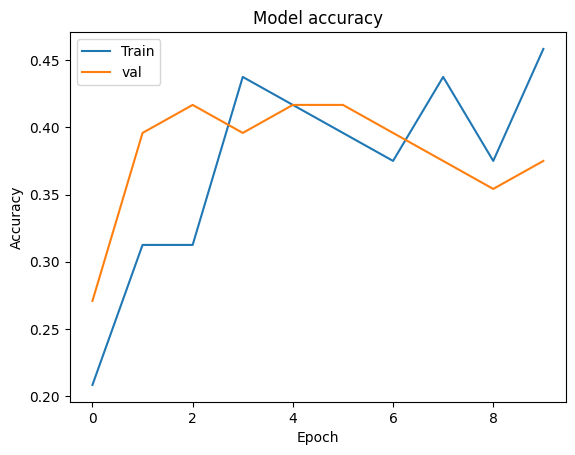

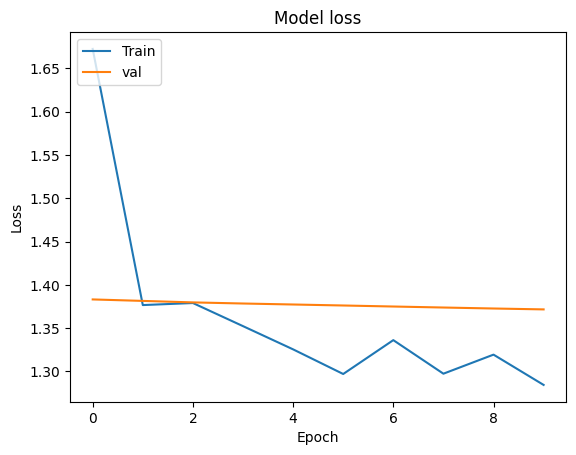


Training on subject  2
Subject: 2   Train no. 1   Time: 1.6 m   Test_acc: 0.2292   Test_kappa: -0.0278
Subject: 2   Train no. 2   Time: 1.0 m   Test_acc: 0.3125   Test_kappa: 0.0833
Subject: 2   Train no. 3   Time: 1.7 m   Test_acc: 0.3750   Test_kappa: 0.1667
Subject: 2   Train no. 4   Time: 1.6 m   Test_acc: 0.3958   Test_kappa: 0.1944
Subject: 2   Train no. 5   Time: 1.6 m   Test_acc: 0.2708   Test_kappa: 0.0278
Subject: 2   Train no. 6   Time: 1.0 m   Test_acc: 0.3542   Test_kappa: 0.1389
Subject: 2   Train no. 7   Time: 1.7 m   Test_acc: 0.3542   Test_kappa: 0.1389
Subject: 2   Train no. 8   Time: 1.0 m   Test_acc: 0.3125   Test_kappa: 0.0833
Subject: 2   Train no. 9   Time: 1.0 m   Test_acc: 0.2292   Test_kappa: -0.0278
Subject: 2   Train no. 10   Time: 1.6 m   Test_acc: 0.2708   Test_kappa: 0.0278
----------
Subject: 2   best_run: 4   Time: 13.9 m   acc: 0.3958   avg_acc: 0.3104 +- 0.0563   kappa: 0.1944   avg_kappa: 0.0806 +- 0.0750
----------
Plot Learning Curves ....... 


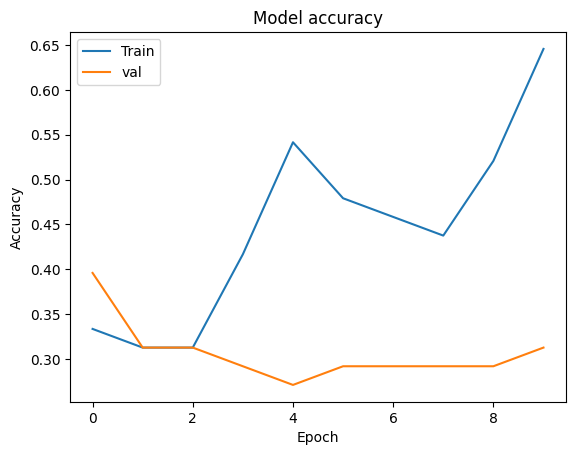

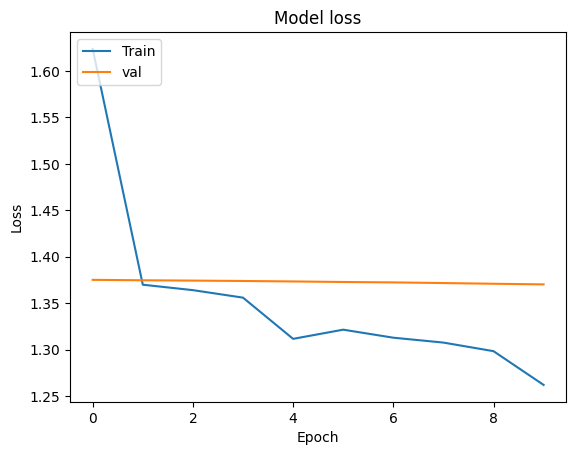


Training on subject  3
Subject: 3   Train no. 1   Time: 1.0 m   Test_acc: 0.3333   Test_kappa: 0.1111
Subject: 3   Train no. 2   Time: 1.7 m   Test_acc: 0.2917   Test_kappa: 0.0556
Subject: 3   Train no. 3   Time: 1.6 m   Test_acc: 0.3125   Test_kappa: 0.0833
Subject: 3   Train no. 4   Time: 1.0 m   Test_acc: 0.4375   Test_kappa: 0.2500
Subject: 3   Train no. 5   Time: 1.7 m   Test_acc: 0.2500   Test_kappa: 0.0000
Subject: 3   Train no. 6   Time: 1.6 m   Test_acc: 0.4375   Test_kappa: 0.2500
Subject: 3   Train no. 7   Time: 1.7 m   Test_acc: 0.3125   Test_kappa: 0.0833
Subject: 3   Train no. 8   Time: 1.6 m   Test_acc: 0.2917   Test_kappa: 0.0556
Subject: 3   Train no. 9   Time: 1.1 m   Test_acc: 0.3958   Test_kappa: 0.1944
Subject: 3   Train no. 10   Time: 1.7 m   Test_acc: 0.4167   Test_kappa: 0.2222
----------
Subject: 3   best_run: 4   Time: 14.7 m   acc: 0.4375   avg_acc: 0.3479 +- 0.0646   kappa: 0.2500   avg_kappa: 0.1306 +- 0.0861
----------
Plot Learning Curves ....... 


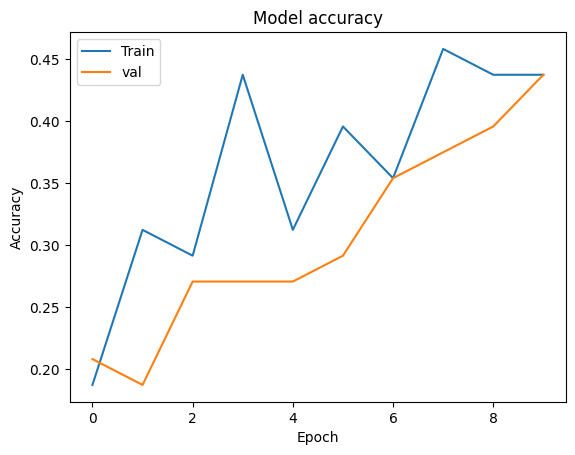

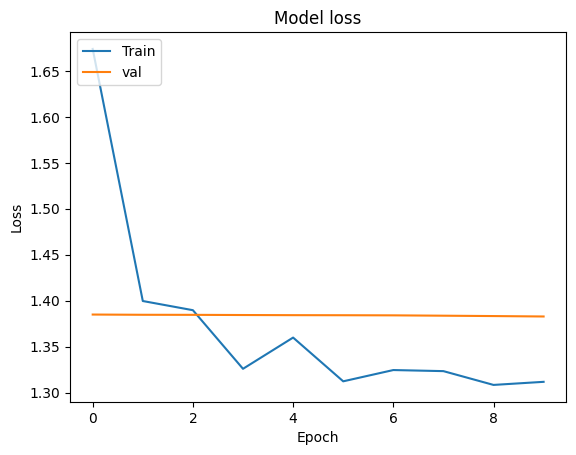


Training on subject  4
Subject: 4   Train no. 1   Time: 1.7 m   Test_acc: 0.3542   Test_kappa: 0.1389
Subject: 4   Train no. 2   Time: 1.6 m   Test_acc: 0.2917   Test_kappa: 0.0556
Subject: 4   Train no. 3   Time: 1.7 m   Test_acc: 0.2292   Test_kappa: -0.0278


KeyboardInterrupt: ignored

In [ ]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import cohen_kappa_score


#%%
def draw_learning_curves(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc='upper left')
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc='upper left')
    plt.show()
    plt.close()

def draw_confusion_matrix(cf_matrix, sub, results_path):
    # Generate confusion matrix plot
    display_labels = ['Left hand', 'Right hand','Foot','Tongue']
    disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, 
                                display_labels=display_labels)
    disp.plot()
    disp.ax_.set_xticklabels(display_labels, rotation=12)
    plt.title('Confusion Matrix of Subject: ' + sub )
    plt.savefig(results_path + '/subject_' + sub + '.png')
    plt.show()

def draw_performance_barChart(num_sub, metric, label):
    fig, ax = plt.subplots()
    x = list(range(1, num_sub+1))
    ax.bar(x, metric, 0.5, label=label)
    ax.set_ylabel(label)
    ax.set_xlabel("Subject")
    ax.set_xticks(x)
    ax.set_title('Model '+ label + ' per subject')
    ax.set_ylim([0,1])
    
    
#%% Training 
def train(dataset_conf, train_conf, results_path):
    # Get the current 'IN' time to calculate the overall training time
    in_exp = time.time()
    # Create a file to store the path of the best model among several runs
    best_models = open(results_path + "/best models.txt", "w")
    # Create a file to store performance during training
    log_write = open(results_path + "/log.txt", "w")
    # Create a .npz file (zipped archive) to store the accuracy and kappa metrics 
    # for all runs (to calculate average accuracy/kappa over all runs)
    perf_allRuns = open(results_path + "/perf_allRuns.npz", 'wb')
    
    # Get dataset paramters
    n_sub = dataset_conf.get('n_sub')
    data_path = dataset_conf.get('data_path')
    isStandard = dataset_conf.get('isStandard')
    LOSO = dataset_conf.get('LOSO')
    # Get training hyperparamters
    batch_size = train_conf.get('batch_size')
    epochs = train_conf.get('epochs')
    patience = train_conf.get('patience')
    lr = train_conf.get('lr')
    LearnCurves = train_conf.get('LearnCurves') # Plot Learning Curves?
    n_train = train_conf.get('n_train')
    model_name = train_conf.get('model')

    # Initialize variables
    acc = np.zeros((n_sub, n_train))
    kappa = np.zeros((n_sub, n_train))
    
    # Iteration over subjects 
    for sub in range(n_sub): # (num_sub): for all subjects, (i-1,i): for the ith subject.
        # Get the current 'IN' time to calculate the subject training time
        in_sub = time.time()
        print('\nTraining on subject ', sub+1)
        log_write.write( '\nTraining on subject '+ str(sub+1) +'\n')
        # Initiating variables to save the best subject accuracy among multiple runs.
        BestSubjAcc = 0 
        bestTrainingHistory = [] 
        # Get training and test data
        X_train, _, y_train_onehot, X_test, _, y_test_onehot = get_data(data_path, sub, LOSO, isStandard)
        
        # Iteration over multiple runs 
        for train in range(n_train): # How many repetitions of training for subject i.
            # Get the current 'IN' time to calculate the 'run' training time
            in_run = time.time()
            # Create folders and files to save trained models for all runs
            filepath = results_path + '/saved models/run-{}'.format(train+1)
            if not os.path.exists(filepath):
                os.makedirs(filepath)        
            filepath = filepath + '/subject-{}.h5'.format(sub+1)
            
            # Create the model
            model = getModel(model_name)
            # Compile and train the model
            model.compile(loss=categorical_crossentropy, optimizer=Adam(learning_rate=lr), metrics=['accuracy'])          
            callbacks = [
                ModelCheckpoint(filepath, monitor='val_accuracy', verbose=0, 
                                save_best_only=True, save_weights_only=True, mode='max'),
                EarlyStopping(monitor='val_accuracy', verbose=1, mode='max', patience=patience)
            ]
            history = model.fit(X_train, y_train_onehot, validation_data=(X_test, y_test_onehot), 
                                epochs=epochs, batch_size=batch_size, callbacks=callbacks, verbose=0)

            # Evaluate the performance of the trained model. 
            # Here we load the Trained weights from the file saved in the hard 
            # disk, which should be the same as the weights of the current model.
            model.load_weights(filepath)
            y_pred = model.predict(X_test).argmax(axis=-1)
            labels = y_test_onehot.argmax(axis=-1)
            acc[sub, train]  = accuracy_score(labels, y_pred)
            kappa[sub, train] = cohen_kappa_score(labels, y_pred)
              
            # Get the current 'OUT' time to calculate the 'run' training time
            out_run = time.time()
            # Print & write performance measures for each run
            info = 'Subject: {}   Train no. {}   Time: {:.1f} m   '.format(sub+1, train+1, ((out_run-in_run)/60))
            info = info + 'Test_acc: {:.4f}   Test_kappa: {:.4f}'.format(acc[sub, train], kappa[sub, train])
            print(info)
            log_write.write(info +'\n')
            # If current training run is better than previous runs, save the history.
            if(BestSubjAcc < acc[sub, train]):
                 BestSubjAcc = acc[sub, train]
                 bestTrainingHistory = history
        
        # Store the path of the best model among several runs
        best_run = np.argmax(acc[sub,:])
        filepath = '/saved models/run-{}/subject-{}.h5'.format(best_run+1, sub+1)+'\n'
        best_models.write(filepath)
        # Get the current 'OUT' time to calculate the subject training time
        out_sub = time.time()
        # Print & write the best subject performance among multiple runs
        info = '----------\n'
        info = info + 'Subject: {}   best_run: {}   Time: {:.1f} m   '.format(sub+1, best_run+1, ((out_sub-in_sub)/60))
        info = info + 'acc: {:.4f}   avg_acc: {:.4f} +- {:.4f}   '.format(acc[sub, best_run], np.average(acc[sub, :]), acc[sub,:].std() )
        info = info + 'kappa: {:.4f}   avg_kappa: {:.4f} +- {:.4f}'.format(kappa[sub, best_run], np.average(kappa[sub, :]), kappa[sub,:].std())
        info = info + '\n----------'
        print(info)
        log_write.write(info+'\n')
        # Plot Learning curves 
        if (LearnCurves == True):
            print('Plot Learning Curves ....... ')
            draw_learning_curves(bestTrainingHistory)
          
    # Get the current 'OUT' time to calculate the overall training time
    out_exp = time.time()
    info = '\nTime: {:.1f} h   '.format( (out_exp-in_exp)/(60*60) )
    print(info)
    log_write.write(info+'\n')
    
    # Store the accuracy and kappa metrics as arrays for all runs into a .npz 
    # file format, which is an uncompressed zipped archive, to calculate average
    # accuracy/kappa over all runs.
    np.savez(perf_allRuns, acc = acc, kappa = kappa)
    
    # Close open files 
    best_models.close()   
    log_write.close() 
    perf_allRuns.close() 


#%% Evaluation 
def test(model, dataset_conf, results_path, allRuns = True):
    # Open the  "Log" file to write the evaluation results 
    log_write = open(results_path + "/log.txt", "a")
    # Open the file that stores the path of the best models among several random runs.
    best_models = open(results_path + "/best models.txt", "r")   
    
    # Get dataset paramters
    n_classes = dataset_conf.get('n_classes')
    n_sub = dataset_conf.get('n_sub')
    data_path = dataset_conf.get('data_path')
    isStandard = dataset_conf.get('isStandard')
    LOSO = dataset_conf.get('LOSO')
    
    # Initialize variables
    acc_bestRun = np.zeros(n_sub)
    kappa_bestRun = np.zeros(n_sub)  
    cf_matrix = np.zeros([n_sub, n_classes, n_classes])

    # Calculate the average performance (average accuracy and K-score) for 
    # all runs (experiments) for each subject.
    if(allRuns): 
        # Load the test accuracy and kappa metrics as arrays for all runs from a .npz 
        # file format, which is an uncompressed zipped archive, to calculate average
        # accuracy/kappa over all runs.
        perf_allRuns = open(results_path + "/perf_allRuns.npz", 'rb')
        perf_arrays = np.load(perf_allRuns)
        acc_allRuns = perf_arrays['acc']
        kappa_allRuns = perf_arrays['kappa']
    
    # Iteration over subjects 
    for sub in range(n_sub): # (num_sub): for all subjects, (i-1,i): for the ith subject.
        # Load data
        _, _, _, X_test, _, y_test_onehot = get_data(data_path, sub, LOSO, isStandard)
        # Load the best model out of multiple random runs (experiments).
        filepath = best_models.readline()
        model.load_weights(results_path + filepath[:-1])
        # Predict MI task
        y_pred = model.predict(X_test).argmax(axis=-1)
        # Calculate accuracy and K-score
        labels = y_test_onehot.argmax(axis=-1)
        acc_bestRun[sub] = accuracy_score(labels, y_pred)
        kappa_bestRun[sub] = cohen_kappa_score(labels, y_pred)
        # Calculate and draw confusion matrix
        cf_matrix[sub, :, :] = confusion_matrix(labels, y_pred, normalize='pred')
        draw_confusion_matrix(cf_matrix[sub, :, :], str(sub+1), results_path)
        
        # Print & write performance measures for each subject
        info = 'Subject: {}   best_run: {:2}  '.format(sub+1, (filepath[filepath.find('run-')+4:filepath.find('/sub')]) )
        info = info + 'acc: {:.4f}   kappa: {:.4f}   '.format(acc_bestRun[sub], kappa_bestRun[sub] )
        if(allRuns): 
            info = info + 'avg_acc: {:.4f} +- {:.4f}   avg_kappa: {:.4f} +- {:.4f}'.format(
                np.average(acc_allRuns[sub, :]), acc_allRuns[sub,:].std(),
                np.average(kappa_allRuns[sub, :]), kappa_allRuns[sub,:].std() )
        print(info)
        log_write.write('\n'+info)
      
    # Print & write the average performance measures for all subjects     
    info = '\nAverage of {} subjects - best runs:\nAccuracy = {:.4f}   Kappa = {:.4f}\n'.format(
        n_sub, np.average(acc_bestRun), np.average(kappa_bestRun)) 
    if(allRuns): 
        info = info + '\nAverage of {} subjects x {} runs (average of {} experiments):\nAccuracy = {:.4f}   Kappa = {:.4f}'.format(
            n_sub, acc_allRuns.shape[1], (n_sub * acc_allRuns.shape[1]),
            np.average(acc_allRuns), np.average(kappa_allRuns)) 
    print(info)
    log_write.write(info)
    
    # Draw a performance bar chart for all subjects 
    draw_performance_barChart(n_sub, acc_bestRun, 'Accuracy')
    draw_performance_barChart(n_sub, kappa_bestRun, 'K-score')
    # Draw confusion matrix for all subjects (average)
    draw_confusion_matrix(cf_matrix.mean(0), 'All', results_path)
    # Close open files     
    log_write.close() 
    
    
#%%
def getModel(model_name):
    # Select the model
    if(model_name == 'ATCNet'):
        # Train using the proposed model (ATCNet): https://doi.org/10.1109/TII.2022.3197419
        model = ATCNet( 
            # Dataset parameters
            n_classes = 4, 
            in_chans = 22, 
            in_samples = 1125, 
            # Sliding window (SW) parameter
            n_windows = 5, 
            # Attention (AT) block parameter
            attention = 'mha', # Options: None, 'mha','mhla', 'cbam', 'se'
            # Convolutional (CV) block parameters
            eegn_F1 = 16,
            eegn_D = 2, 
            eegn_kernelSize = 64,
            eegn_poolSize = 7,
            eegn_dropout = 0.3,
            # Temporal convolutional (TC) block parameters
            tcn_depth = 2, 
            tcn_kernelSize = 4,
            tcn_filters = 32,
            tcn_dropout = 0.3, 
            tcn_activation='elu'
            )     
    elif(model_name == 'TCNet_Fusion'):
        # Train using TCNet_Fusion: https://doi.org/10.1016/j.bspc.2021.102826
        model = TCNet_Fusion(n_classes = 4)      
    elif(model_name == 'EEGTCNet'):
        # Train using EEGTCNet: https://arxiv.org/abs/2006.00622
        model = EEGTCNet(n_classes = 4)          
    elif(model_name == 'EEGNet'):
        # Train using EEGNet: https://arxiv.org/abs/1611.08024
        model = EEGNet_classifier(n_classes = 4) 
    elif(model_name == 'EEGNeX'):
        # Train using EEGNeX: https://arxiv.org/abs/2207.12369
        model = EEGNeX_8_32(n_timesteps = 1125 , n_features = 22, n_outputs = 4)
    elif(model_name == 'DeepConvNet'):
        # Train using DeepConvNet: https://doi.org/10.1002/hbm.23730
        model = DeepConvNet(nb_classes = 4 , Chans = 22, Samples = 1125)
    elif(model_name == 'ShallowConvNet'):
        # Train using ShallowConvNet: https://doi.org/10.1002/hbm.23730
        model = ShallowConvNet(nb_classes = 4 , Chans = 22, Samples = 1125)
    else:
        raise Exception("'{}' model is not supported yet!".format(model_name))

    return model
    
    
#%%
def run():
    # Get dataset path
    # data_path = os.path.expanduser('~') + '/BCI Competition IV/BCI Competition IV-2a/'
    
    # Create a folder to store the results of the experiment
    results_path = os.getcwd() + "/results"
    if not  os.path.exists(results_path):
      os.makedirs(results_path)   # Create a new directory if it does not exist 
      
    # Set dataset paramters 
    dataset_conf = { 'n_classes': 4, 'n_sub': 9, 'n_channels': 22, 'data_path': data_path,
                'isStandard': True, 'LOSO': False}
    dataset_conf = { 'n_classes': 4, 'n_sub': 9, 'n_channels': 22, 'data_path': data_path,
                'isStandard': True, 'LOSO': False}
    # Set training hyperparamters
    train_conf = { 'batch_size': 64, 'epochs': 1000, 'patience': 300, 'lr': 0.0009,
                  'LearnCurves': True, 'n_train': 10, 'model':'ATCNet'}
    train_conf = { 'batch_size': 64, 'epochs': 10, 'patience': 300, 'lr': 0.0009,
                  'LearnCurves': True, 'n_train': 10, 'model':'ATCNet'}
           
    # Train the model
    train(dataset_conf, train_conf, results_path)

    # Evaluate the model based on the weights saved in the '/results' folder
    model = getModel(train_conf.get('model'))
    # test(model, dataset_conf, results_path)    
    
#%%
if __name__ == "__main__":
    run()
    


Training on subject  1
Subject: 1   Train no. 1   Time: 7.7 m   Test_acc: 0.3958   Test_kappa: 0.1944
Subject: 1   Train no. 2   Time: 7.4 m   Test_acc: 0.3958   Test_kappa: 0.1944
Subject: 1   Train no. 3   Time: 7.7 m   Test_acc: 0.3125   Test_kappa: 0.0833
Subject: 1   Train no. 4   Time: 7.6 m   Test_acc: 0.3958   Test_kappa: 0.1944
Subject: 1   Train no. 5   Time: 7.7 m   Test_acc: 0.4583   Test_kappa: 0.2778
Subject: 1   Train no. 6   Time: 7.7 m   Test_acc: 0.4583   Test_kappa: 0.2778
Subject: 1   Train no. 7   Time: 7.6 m   Test_acc: 0.4167   Test_kappa: 0.2222
Subject: 1   Train no. 8   Time: 7.4 m   Test_acc: 0.4167   Test_kappa: 0.2222
Subject: 1   Train no. 9   Time: 7.6 m   Test_acc: 0.4792   Test_kappa: 0.3056
Subject: 1   Train no. 10   Time: 7.7 m   Test_acc: 0.3958   Test_kappa: 0.1944
----------
Subject: 1   best_run: 9   Time: 76.3 m   acc: 0.4792   avg_acc: 0.4125 +- 0.0445   kappa: 0.3056   avg_kappa: 0.2167 +- 0.0593
----------
Plot Learning Curves ....... 


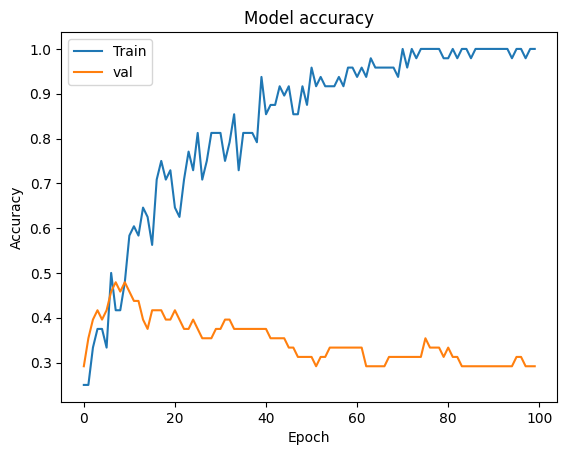

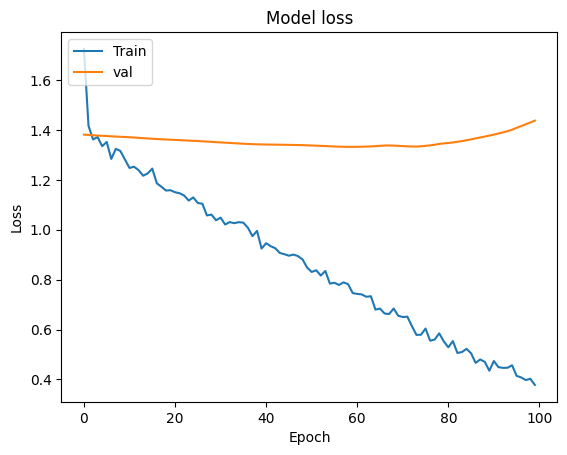


Time: 1.3 h   


In [ ]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import cohen_kappa_score


#%%
def draw_learning_curves(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc='upper left')
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc='upper left')
    plt.show()
    plt.close()

def draw_confusion_matrix(cf_matrix, sub, results_path):
    # Generate confusion matrix plot
    display_labels = ['Left hand', 'Right hand','Foot','Tongue']
    disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, 
                                display_labels=display_labels)
    disp.plot()
    disp.ax_.set_xticklabels(display_labels, rotation=12)
    plt.title('Confusion Matrix of Subject: ' + sub )
    plt.savefig(results_path + '/subject_' + sub + '.png')
    plt.show()

def draw_performance_barChart(num_sub, metric, label):
    fig, ax = plt.subplots()
    x = list(range(1, num_sub+1))
    ax.bar(x, metric, 0.5, label=label)
    ax.set_ylabel(label)
    ax.set_xlabel("Subject")
    ax.set_xticks(x)
    ax.set_title('Model '+ label + ' per subject')
    ax.set_ylim([0,1])
    
    
#%% Training 
def train(dataset_conf, train_conf, results_path):
    # Get the current 'IN' time to calculate the overall training time
    in_exp = time.time()
    # Create a file to store the path of the best model among several runs
    best_models = open(results_path + "/best models.txt", "w")
    # Create a file to store performance during training
    log_write = open(results_path + "/log.txt", "w")
    # Create a .npz file (zipped archive) to store the accuracy and kappa metrics 
    # for all runs (to calculate average accuracy/kappa over all runs)
    perf_allRuns = open(results_path + "/perf_allRuns.npz", 'wb')
    
    # Get dataset paramters
    n_sub = dataset_conf.get('n_sub')
    data_path = dataset_conf.get('data_path')
    isStandard = dataset_conf.get('isStandard')
    LOSO = dataset_conf.get('LOSO')
    # Get training hyperparamters
    batch_size = train_conf.get('batch_size')
    epochs = train_conf.get('epochs')
    patience = train_conf.get('patience')
    lr = train_conf.get('lr')
    LearnCurves = train_conf.get('LearnCurves') # Plot Learning Curves?
    n_train = train_conf.get('n_train')
    model_name = train_conf.get('model')

    # Initialize variables
    acc = np.zeros((n_sub, n_train))
    kappa = np.zeros((n_sub, n_train))
    
    # Iteration over subjects 
    for sub in range(n_sub): # (num_sub): for all subjects, (i-1,i): for the ith subject.
        # Get the current 'IN' time to calculate the subject training time
        in_sub = time.time()
        print('\nTraining on subject ', sub+1)
        log_write.write( '\nTraining on subject '+ str(sub+1) +'\n')
        # Initiating variables to save the best subject accuracy among multiple runs.
        BestSubjAcc = 0 
        bestTrainingHistory = [] 
        # Get training and test data
        X_train, _, y_train_onehot, X_test, _, y_test_onehot = get_data(data_path, sub, LOSO, isStandard)
        
        # Iteration over multiple runs 
        for train in range(n_train): # How many repetitions of training for subject i.
            # Get the current 'IN' time to calculate the 'run' training time
            in_run = time.time()
            # Create folders and files to save trained models for all runs
            filepath = results_path + '/saved models/run-{}'.format(train+1)
            if not os.path.exists(filepath):
                os.makedirs(filepath)        
            filepath = filepath + '/subject-{}.h5'.format(sub+1)
            
            # Create the model
            model = getModel(model_name)
            # Compile and train the model
            model.compile(loss=categorical_crossentropy, optimizer=Adam(learning_rate=lr), metrics=['accuracy'])          
            callbacks = [
                ModelCheckpoint(filepath, monitor='val_accuracy', verbose=0, 
                                save_best_only=True, save_weights_only=True, mode='max'),
                EarlyStopping(monitor='val_accuracy', verbose=1, mode='max', patience=patience)
            ]
            history = model.fit(X_train, y_train_onehot, validation_data=(X_test, y_test_onehot), 
                                epochs=epochs, batch_size=batch_size, callbacks=callbacks, verbose=0)

            # Evaluate the performance of the trained model. 
            # Here we load the Trained weights from the file saved in the hard 
            # disk, which should be the same as the weights of the current model.
            model.load_weights(filepath)
            y_pred = model.predict(X_test).argmax(axis=-1)
            labels = y_test_onehot.argmax(axis=-1)
            acc[sub, train]  = accuracy_score(labels, y_pred)
            kappa[sub, train] = cohen_kappa_score(labels, y_pred)
              
            # Get the current 'OUT' time to calculate the 'run' training time
            out_run = time.time()
            # Print & write performance measures for each run
            info = 'Subject: {}   Train no. {}   Time: {:.1f} m   '.format(sub+1, train+1, ((out_run-in_run)/60))
            info = info + 'Test_acc: {:.4f}   Test_kappa: {:.4f}'.format(acc[sub, train], kappa[sub, train])
            print(info)
            log_write.write(info +'\n')
            # If current training run is better than previous runs, save the history.
            if(BestSubjAcc < acc[sub, train]):
                 BestSubjAcc = acc[sub, train]
                 bestTrainingHistory = history
        
        # Store the path of the best model among several runs
        best_run = np.argmax(acc[sub,:])
        filepath = '/saved models/run-{}/subject-{}.h5'.format(best_run+1, sub+1)+'\n'
        best_models.write(filepath)
        # Get the current 'OUT' time to calculate the subject training time
        out_sub = time.time()
        # Print & write the best subject performance among multiple runs
        info = '----------\n'
        info = info + 'Subject: {}   best_run: {}   Time: {:.1f} m   '.format(sub+1, best_run+1, ((out_sub-in_sub)/60))
        info = info + 'acc: {:.4f}   avg_acc: {:.4f} +- {:.4f}   '.format(acc[sub, best_run], np.average(acc[sub, :]), acc[sub,:].std() )
        info = info + 'kappa: {:.4f}   avg_kappa: {:.4f} +- {:.4f}'.format(kappa[sub, best_run], np.average(kappa[sub, :]), kappa[sub,:].std())
        info = info + '\n----------'
        print(info)
        log_write.write(info+'\n')
        # Plot Learning curves 
        if (LearnCurves == True):
            print('Plot Learning Curves ....... ')
            draw_learning_curves(bestTrainingHistory)
          
    # Get the current 'OUT' time to calculate the overall training time
    out_exp = time.time()
    info = '\nTime: {:.1f} h   '.format( (out_exp-in_exp)/(60*60) )
    print(info)
    log_write.write(info+'\n')
    
    # Store the accuracy and kappa metrics as arrays for all runs into a .npz 
    # file format, which is an uncompressed zipped archive, to calculate average
    # accuracy/kappa over all runs.
    np.savez(perf_allRuns, acc = acc, kappa = kappa)
    
    # Close open files 
    best_models.close()   
    log_write.close() 
    perf_allRuns.close() 


#%% Evaluation 
def test(model, dataset_conf, results_path, allRuns = True):
    # Open the  "Log" file to write the evaluation results 
    log_write = open(results_path + "/log.txt", "a")
    # Open the file that stores the path of the best models among several random runs.
    best_models = open(results_path + "/best models.txt", "r")   
    
    # Get dataset paramters
    n_classes = dataset_conf.get('n_classes')
    n_sub = dataset_conf.get('n_sub')
    data_path = dataset_conf.get('data_path')
    isStandard = dataset_conf.get('isStandard')
    LOSO = dataset_conf.get('LOSO')
    
    # Initialize variables
    acc_bestRun = np.zeros(n_sub)
    kappa_bestRun = np.zeros(n_sub)  
    cf_matrix = np.zeros([n_sub, n_classes, n_classes])

    # Calculate the average performance (average accuracy and K-score) for 
    # all runs (experiments) for each subject.
    if(allRuns): 
        # Load the test accuracy and kappa metrics as arrays for all runs from a .npz 
        # file format, which is an uncompressed zipped archive, to calculate average
        # accuracy/kappa over all runs.
        perf_allRuns = open(results_path + "/perf_allRuns.npz", 'rb')
        perf_arrays = np.load(perf_allRuns)
        acc_allRuns = perf_arrays['acc']
        kappa_allRuns = perf_arrays['kappa']
    
    # Iteration over subjects 
    for sub in range(n_sub): # (num_sub): for all subjects, (i-1,i): for the ith subject.
        # Load data
        _, _, _, X_test, _, y_test_onehot = get_data(data_path, sub, LOSO, isStandard)
        # Load the best model out of multiple random runs (experiments).
        filepath = best_models.readline()
        model.load_weights(results_path + filepath[:-1])
        # Predict MI task
        y_pred = model.predict(X_test).argmax(axis=-1)
        # Calculate accuracy and K-score
        labels = y_test_onehot.argmax(axis=-1)
        acc_bestRun[sub] = accuracy_score(labels, y_pred)
        kappa_bestRun[sub] = cohen_kappa_score(labels, y_pred)
        # Calculate and draw confusion matrix
        cf_matrix[sub, :, :] = confusion_matrix(labels, y_pred, normalize='pred')
        draw_confusion_matrix(cf_matrix[sub, :, :], str(sub+1), results_path)
        
        # Print & write performance measures for each subject
        info = 'Subject: {}   best_run: {:2}  '.format(sub+1, (filepath[filepath.find('run-')+4:filepath.find('/sub')]) )
        info = info + 'acc: {:.4f}   kappa: {:.4f}   '.format(acc_bestRun[sub], kappa_bestRun[sub] )
        if(allRuns): 
            info = info + 'avg_acc: {:.4f} +- {:.4f}   avg_kappa: {:.4f} +- {:.4f}'.format(
                np.average(acc_allRuns[sub, :]), acc_allRuns[sub,:].std(),
                np.average(kappa_allRuns[sub, :]), kappa_allRuns[sub,:].std() )
        print(info)
        log_write.write('\n'+info)
      
    # Print & write the average performance measures for all subjects     
    info = '\nAverage of {} subjects - best runs:\nAccuracy = {:.4f}   Kappa = {:.4f}\n'.format(
        n_sub, np.average(acc_bestRun), np.average(kappa_bestRun)) 
    if(allRuns): 
        info = info + '\nAverage of {} subjects x {} runs (average of {} experiments):\nAccuracy = {:.4f}   Kappa = {:.4f}'.format(
            n_sub, acc_allRuns.shape[1], (n_sub * acc_allRuns.shape[1]),
            np.average(acc_allRuns), np.average(kappa_allRuns)) 
    print(info)
    log_write.write(info)
    
    # Draw a performance bar chart for all subjects 
    draw_performance_barChart(n_sub, acc_bestRun, 'Accuracy')
    draw_performance_barChart(n_sub, kappa_bestRun, 'K-score')
    # Draw confusion matrix for all subjects (average)
    draw_confusion_matrix(cf_matrix.mean(0), 'All', results_path)
    # Close open files     
    log_write.close() 
    
    
#%%
def getModel(model_name):
    # Select the model
    if(model_name == 'ATCNet'):
        # Train using the proposed model (ATCNet): https://doi.org/10.1109/TII.2022.3197419
        model = ATCNet( 
            # Dataset parameters
            n_classes = 4, 
            in_chans = 22, 
            in_samples = 1125, 
            # Sliding window (SW) parameter
            n_windows = 5, 
            # Attention (AT) block parameter
            attention = 'mha', # Options: None, 'mha','mhla', 'cbam', 'se'
            # Convolutional (CV) block parameters
            eegn_F1 = 16,
            eegn_D = 2, 
            eegn_kernelSize = 64,
            eegn_poolSize = 7,
            eegn_dropout = 0.3,
            # Temporal convolutional (TC) block parameters
            tcn_depth = 2, 
            tcn_kernelSize = 4,
            tcn_filters = 32,
            tcn_dropout = 0.3, 
            tcn_activation='elu'
            )     
    elif(model_name == 'TCNet_Fusion'):
        # Train using TCNet_Fusion: https://doi.org/10.1016/j.bspc.2021.102826
        model = TCNet_Fusion(n_classes = 4)      
    elif(model_name == 'EEGTCNet'):
        # Train using EEGTCNet: https://arxiv.org/abs/2006.00622
        model = EEGTCNet(n_classes = 4)          
    elif(model_name == 'EEGNet'):
        # Train using EEGNet: https://arxiv.org/abs/1611.08024
        model = EEGNet_classifier(n_classes = 4) 
    elif(model_name == 'EEGNeX'):
        # Train using EEGNeX: https://arxiv.org/abs/2207.12369
        model = EEGNeX_8_32(n_timesteps = 1125 , n_features = 22, n_outputs = 4)
    elif(model_name == 'DeepConvNet'):
        # Train using DeepConvNet: https://doi.org/10.1002/hbm.23730
        model = DeepConvNet(nb_classes = 4 , Chans = 22, Samples = 1125)
    elif(model_name == 'ShallowConvNet'):
        # Train using ShallowConvNet: https://doi.org/10.1002/hbm.23730
        model = ShallowConvNet(nb_classes = 4 , Chans = 22, Samples = 1125)
    else:
        raise Exception("'{}' model is not supported yet!".format(model_name))

    return model
    
    
#%%
def run():
    # Get dataset path
    # data_path = os.path.expanduser('~') + '/BCI Competition IV/BCI Competition IV-2a/'
    
    # Create a folder to store the results of the experiment
    results_path = os.getcwd() + "/results"
    if not  os.path.exists(results_path):
      os.makedirs(results_path)   # Create a new directory if it does not exist 
      
    # Set dataset paramters 
    dataset_conf = { 'n_classes': 4, 'n_sub': 9, 'n_channels': 22, 'data_path': data_path,
                'isStandard': True, 'LOSO': False}
    dataset_conf = { 'n_classes': 4, 'n_sub': 1, 'n_channels': 22, 'data_path': data_path,
                'isStandard': True, 'LOSO': False}
    # Set training hyperparamters
    train_conf = { 'batch_size': 64, 'epochs': 1000, 'patience': 300, 'lr': 0.0009,
                  'LearnCurves': True, 'n_train': 10, 'model':'ATCNet'}
    train_conf = { 'batch_size': 64, 'epochs': 100, 'patience': 300, 'lr': 0.0009,
                  'LearnCurves': True, 'n_train': 10, 'model':'ATCNet'}
           
    # Train the model
    train(dataset_conf, train_conf, results_path)

    # Evaluate the model based on the weights saved in the '/results' folder
    model = getModel(train_conf.get('model'))
    # test(model, dataset_conf, results_path)    
    
#%%
if __name__ == "__main__":
    run()
    